(0.0001, 5.0, '% finished')
(0.0002, 10.0, '% finished')
(0.00030000000000000003, 15.000000000000002, '% finished')
(0.0004, 20.0, '% finished')
(0.0005, 25.0, '% finished')
(0.0006000000000000001, 30.000000000000004, '% finished')
(0.0007000000000000001, 35.0, '% finished')
(0.0008000000000000001, 40.00000000000001, '% finished')
(0.0009000000000000002, 45.00000000000001, '% finished')
(0.0010000000000000002, 50.000000000000014, '% finished')
(0.0011000000000000003, 55.000000000000014, '% finished')
(0.0012000000000000003, 60.00000000000002, '% finished')
(0.0013000000000000004, 65.00000000000001, '% finished')
(0.0014000000000000004, 70.00000000000001, '% finished')
(0.0015000000000000005, 75.00000000000003, '% finished')
(0.0016000000000000005, 80.00000000000003, '% finished')
(0.0017000000000000006, 85.00000000000003, '% finished')
(0.0018000000000000006, 90.00000000000003, '% finished')
(0.0019000000000000006, 95.00000000000003, '% finished')
Total Runtime is--- 76.3569569588 seco

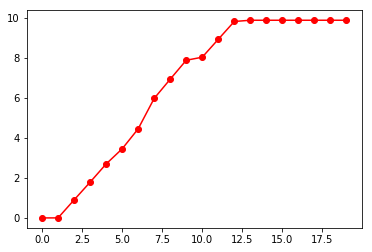

In [7]:
N=10  #Number of layers of molecules

import math
import time
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib as plt
import scipy
from scipy.optimize import basinhopping

angle = np.random.uniform(0,2*math.pi,(N,1))
#angle = sol.x
r=np.arange(N)
########################################################################

##define POLAR .987
#define J1 2
#define J2 .897
#define J3 .66
#define T 1400

start_time = time.time()
#185oC with J2 and J3 being 2.0e-5 and 4.0e-5 respectively
J1=3.0E-4
J2=2.0E-5 
J3=4.0E-5
TPU=187 
TAF = 175
T=185
#P=(TPU-T)/B
P=0.987

########################################################################
#periodic boundary condition applied on the chain

def hamiltonian(angle):
    cost = 0
    i=0
    z=1
    last_row=len(angle)
    while i <(len(angle)):
        cost = cost + J1*P**2 *np.cos(angle[(i+1)%N]-angle[(i)%N] ) - J2*P**4* np.cos(angle[(i+1)%N]-angle[(i)%N])  + J3*np.cos(angle[(i+1)%N]-angle[(i-1)%N]) + P*field*np.cos(angle[(i)%N])
        i=i+1
    energy=cost
    return (energy)
########################################################################



k=1
field=0.0
field_step = .0001
final_field = .002
Emin=np.arange(final_field/field_step)
pol = np.arange(final_field/field_step)
while k < math.floor(final_field/field_step):
    sol = scipy.optimize.basinhopping(hamiltonian, angle, niter=100, T=1.0, stepsize=0.5, minimizer_kwargs=None, take_step=None, accept_test=None, callback=None, interval=50, disp=False, niter_success=None, seed=None)
    final_config = sol.x
    final_config=math.pi-final_config%(2*math.pi)
    Emin[k] = sol.fun
    pol[k] = np.sum(np.cos(final_config))*P
    field = field+(field_step)
    k+=1
    print (field,field/final_field*100, "% finished")
print("Total Runtime is--- %s seconds ---" % (time.time() - start_time))
#plt.plot(r, final_config, '-ro')
#plt.plot(Emin, '-ro')
plt.plot(pol, '-ro')

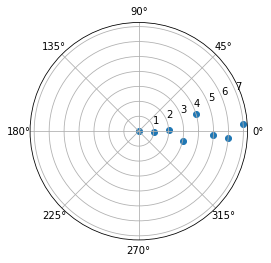

In [42]:
ax = plt.subplot(111, projection='polar')
ax.scatter(final_config*180/math.pi,r)